In [1]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
zip_file = '/content/archive.zip'
extract = 'extracted_data'

In [ ]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract)

In [ ]:
csv_path = os.path.join(extract, 'diabetes.csv')

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# EDA

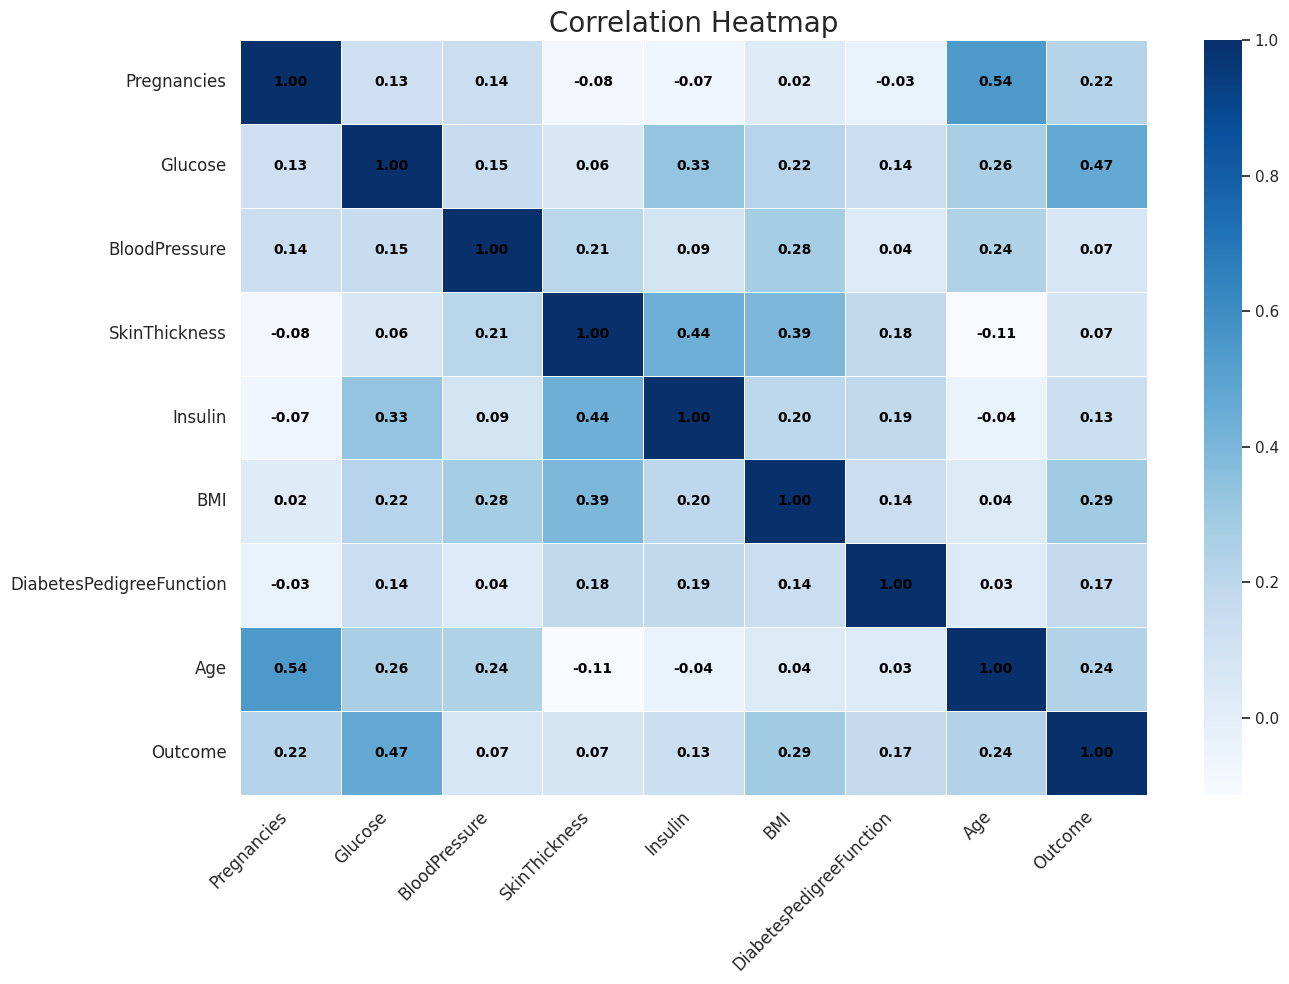

In [4]:
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5, fmt=".2f", annot_kws={"size": 10, "weight": "bold", "color": "black"})

plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()

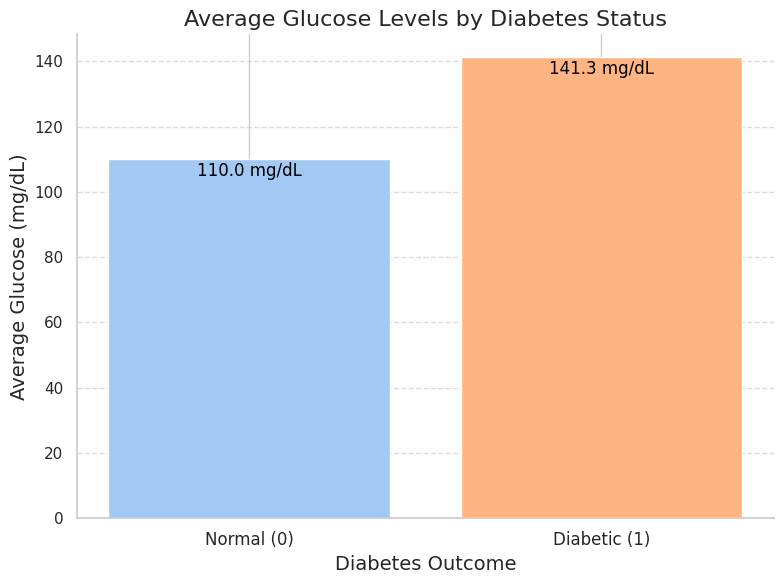

In [18]:

# Calculate average glucose by outcome
avg_glucose = df.groupby('Outcome')['Glucose'].mean().reset_index()

colors = sns.color_palette("pastel", len(avg_glucose))

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_glucose['Outcome'], avg_glucose['Glucose'], color=colors)


for bar, avg in zip(bars, avg_glucose['Glucose']):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() - 5,
             f"{avg:.1f} mg/dL",
             ha='center',
             color='black',
             fontsize=12)

plt.title('Average Glucose Levels by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Outcome', fontsize=14)
plt.ylabel('Average Glucose (mg/dL)', fontsize=14)
plt.xticks(avg_glucose['Outcome'], ['Normal (0)', 'Diabetic (1)'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

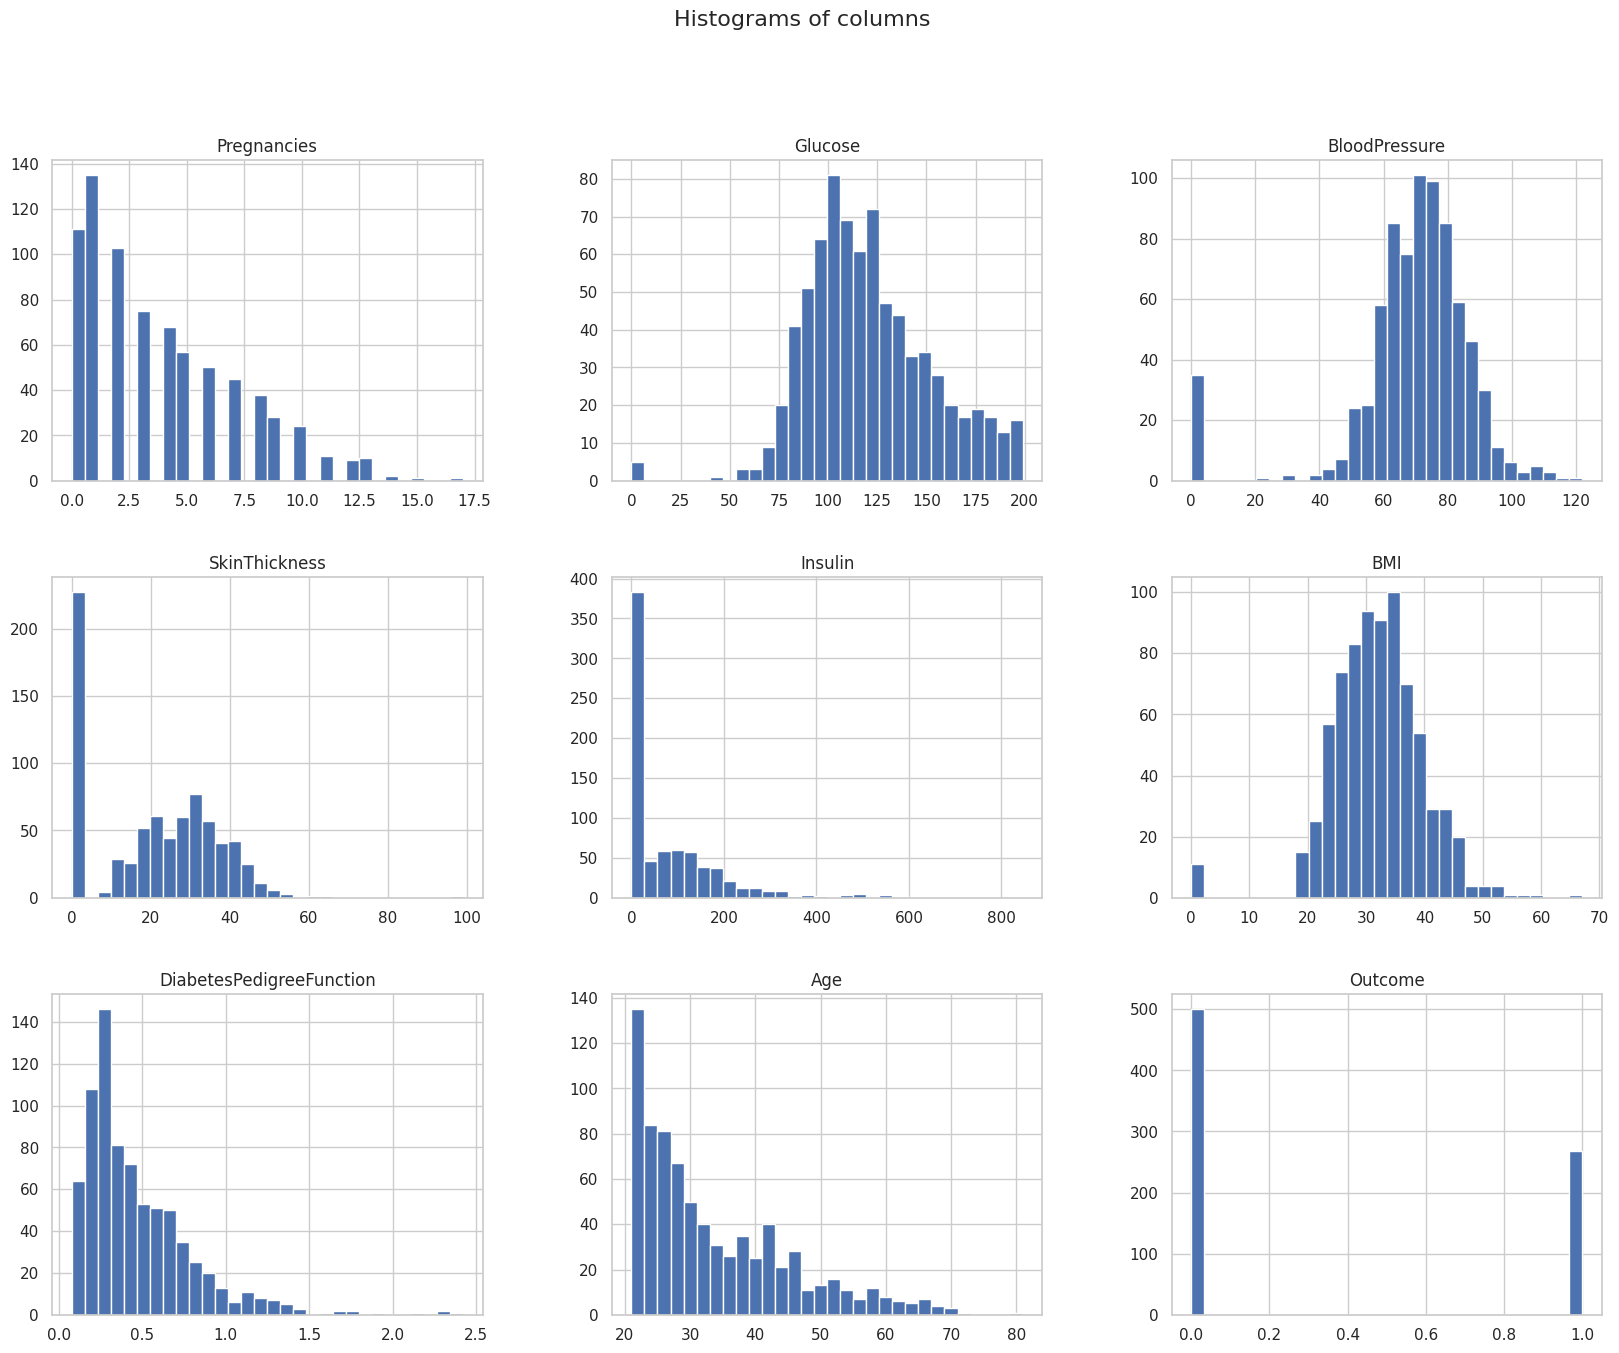

In [19]:
df.hist(figsize=(20, 15), bins=30)
plt.suptitle('Histograms of columns', fontsize=16)
plt.show()

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


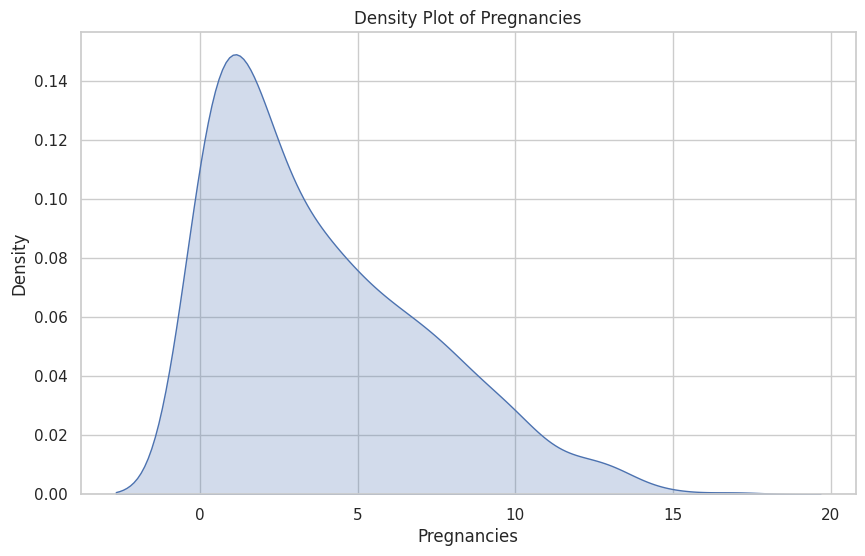

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


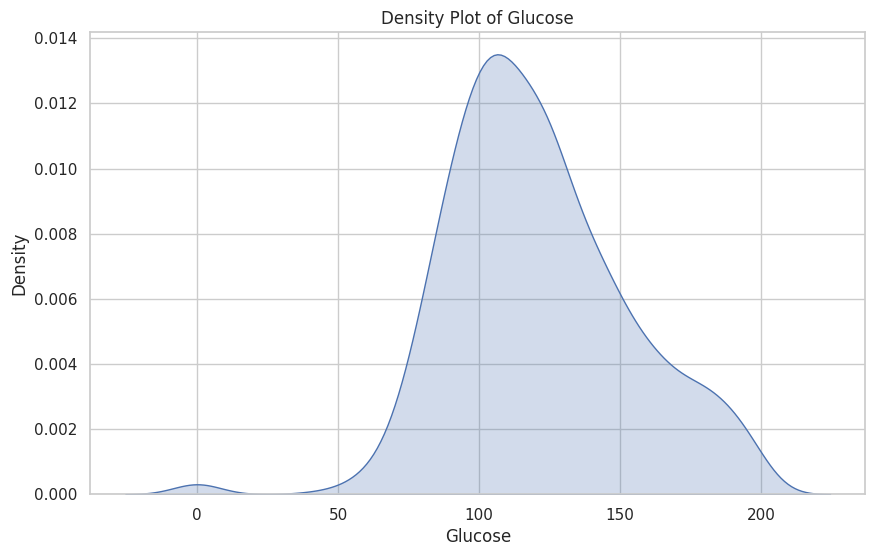

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


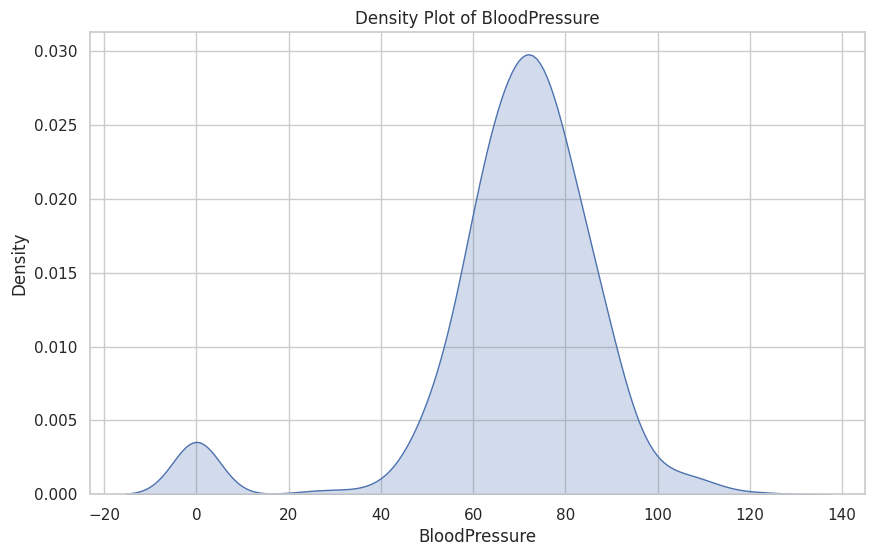

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


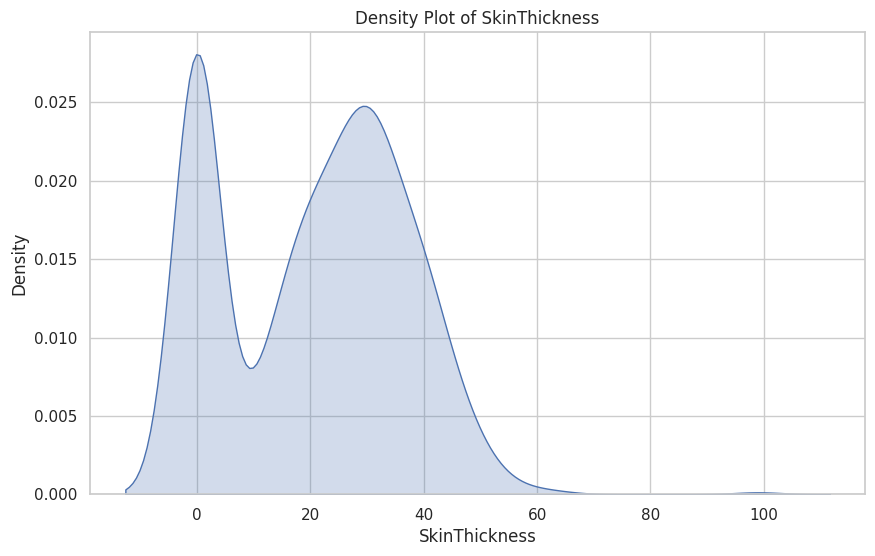

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


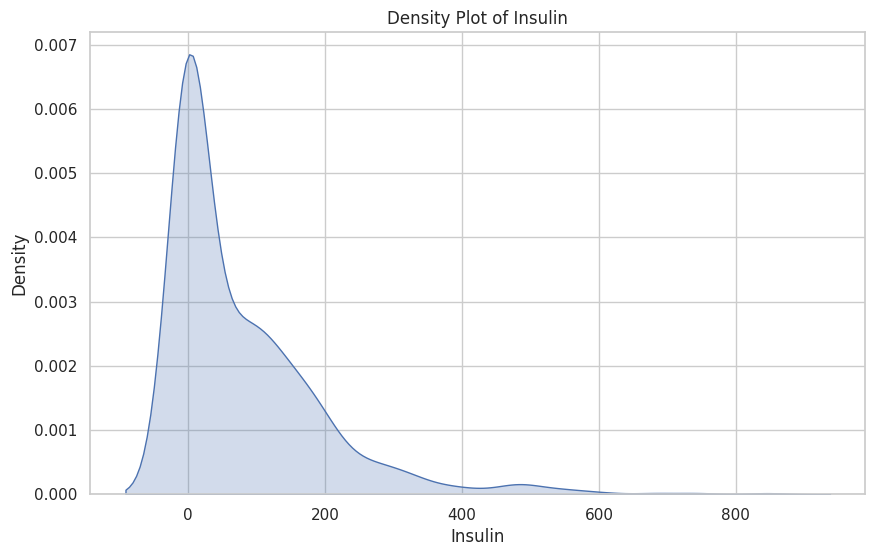

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


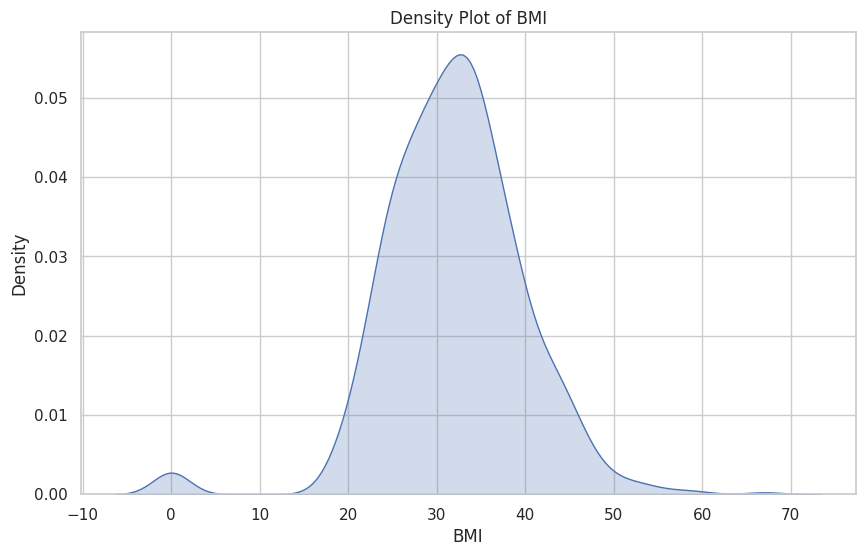

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


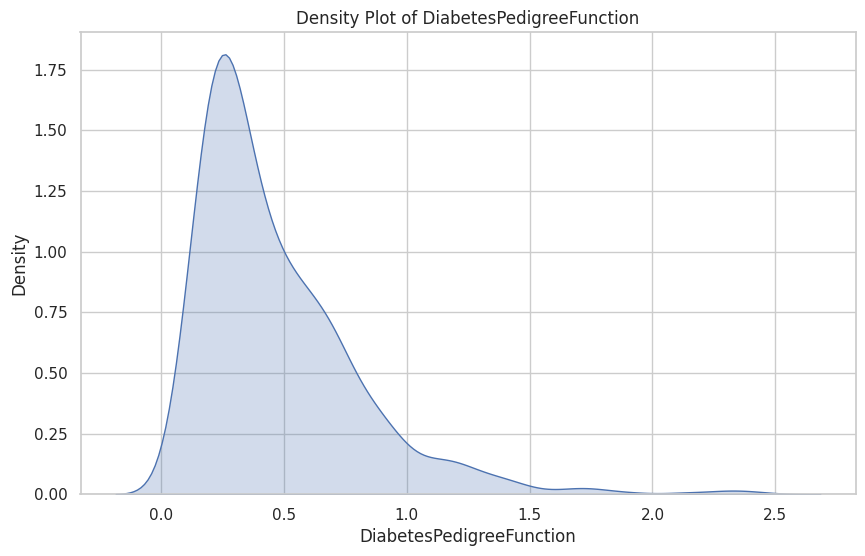

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


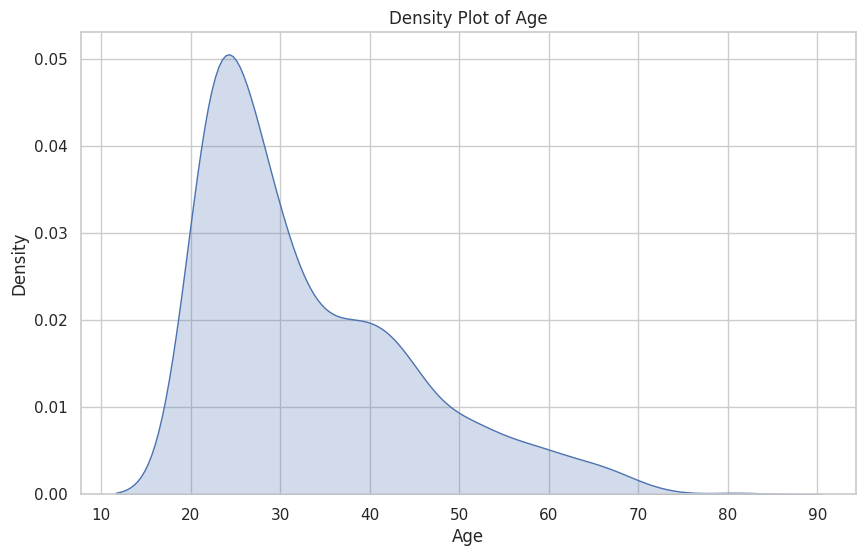

<ipython-input-20-f0869ec9ffa5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


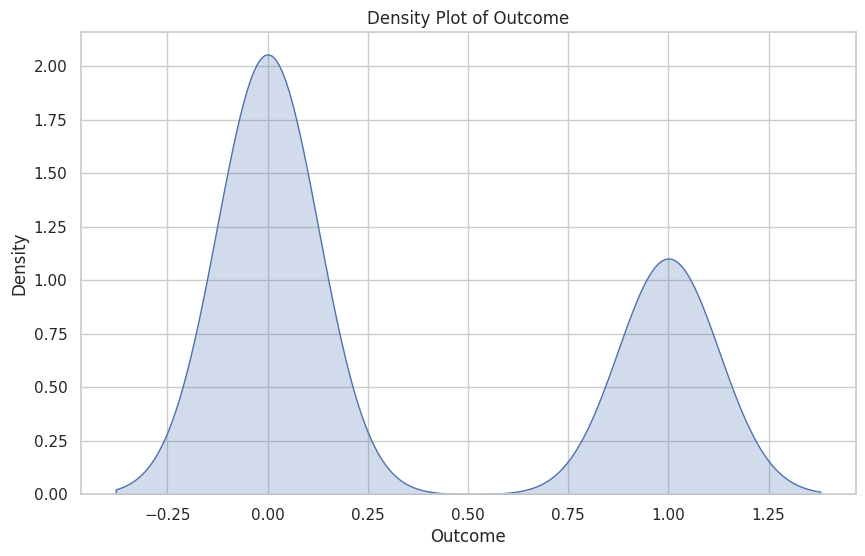

In [20]:
for column in df:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


<ipython-input-22-3da19cf1b39a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


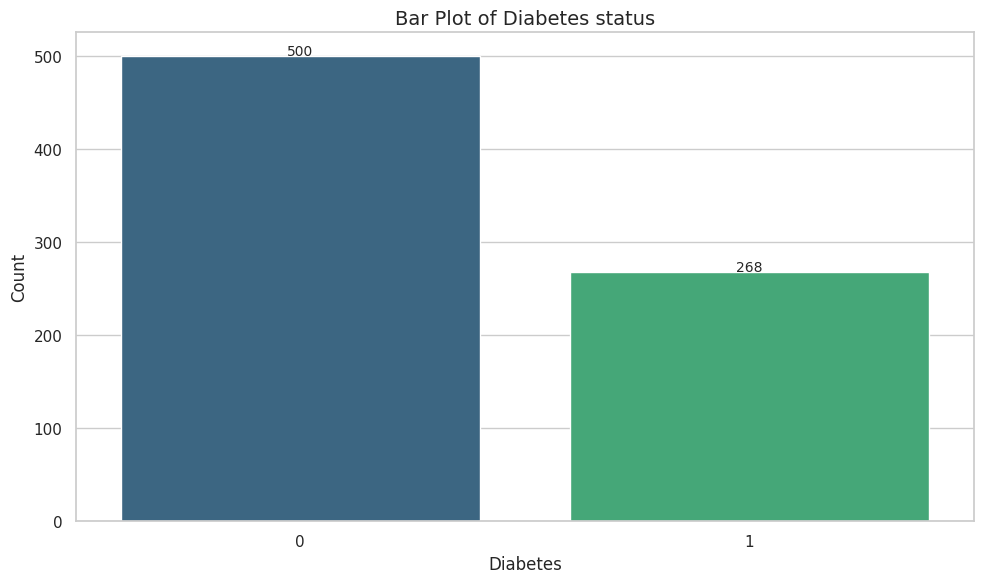

In [22]:
column = 'Outcome'
# Calculate the value counts for the column
value_counts = df[column].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Bar Plot of Diabetes status', fontsize=14)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i in range(len(value_counts)):
    plt.text(i, value_counts[i] + 0.5, str(value_counts[i]), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

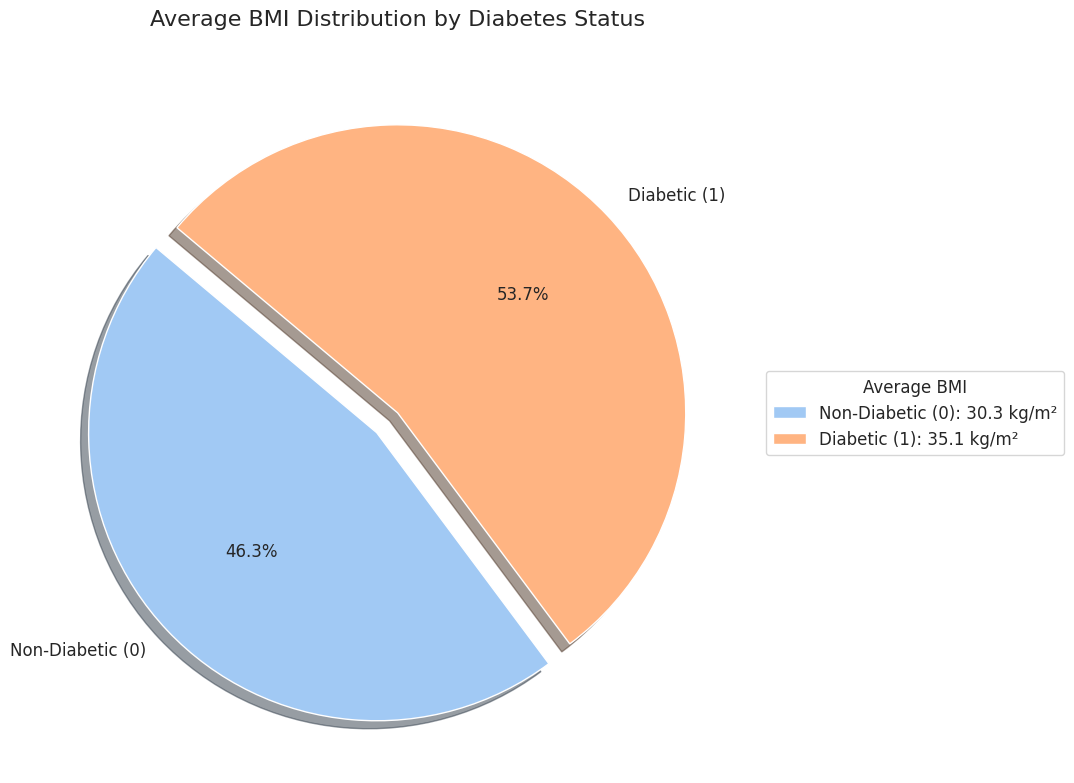

In [23]:
# Calculate average BMI by outcome
avg_bmi = df.groupby('Outcome')['BMI'].mean().reset_index()
plt.figure(figsize=(10, 8))

# Create a pie chart
explode = [0.1, 0]
colors = sns.color_palette("pastel", len(avg_bmi))

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    avg_bmi['BMI'],
    labels=['Non-Diabetic (0)', 'Diabetic (1)'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title('Average BMI Distribution by Diabetes Status', fontsize=16, pad=20)
legend_labels = [f"{label}: {avg:.1f} kg/m²"
                for label, avg in zip(['Non-Diabetic (0)', 'Diabetic (1)'], avg_bmi['BMI'])]
plt.legend(wedges, legend_labels,
           title="Average BMI",
           loc="center left",
           bbox_to_anchor=(1, 0.5),
           fontsize=12)


plt.tight_layout()
plt.show()

<ipython-input-24-5e3f5bf29816>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette='pastel')


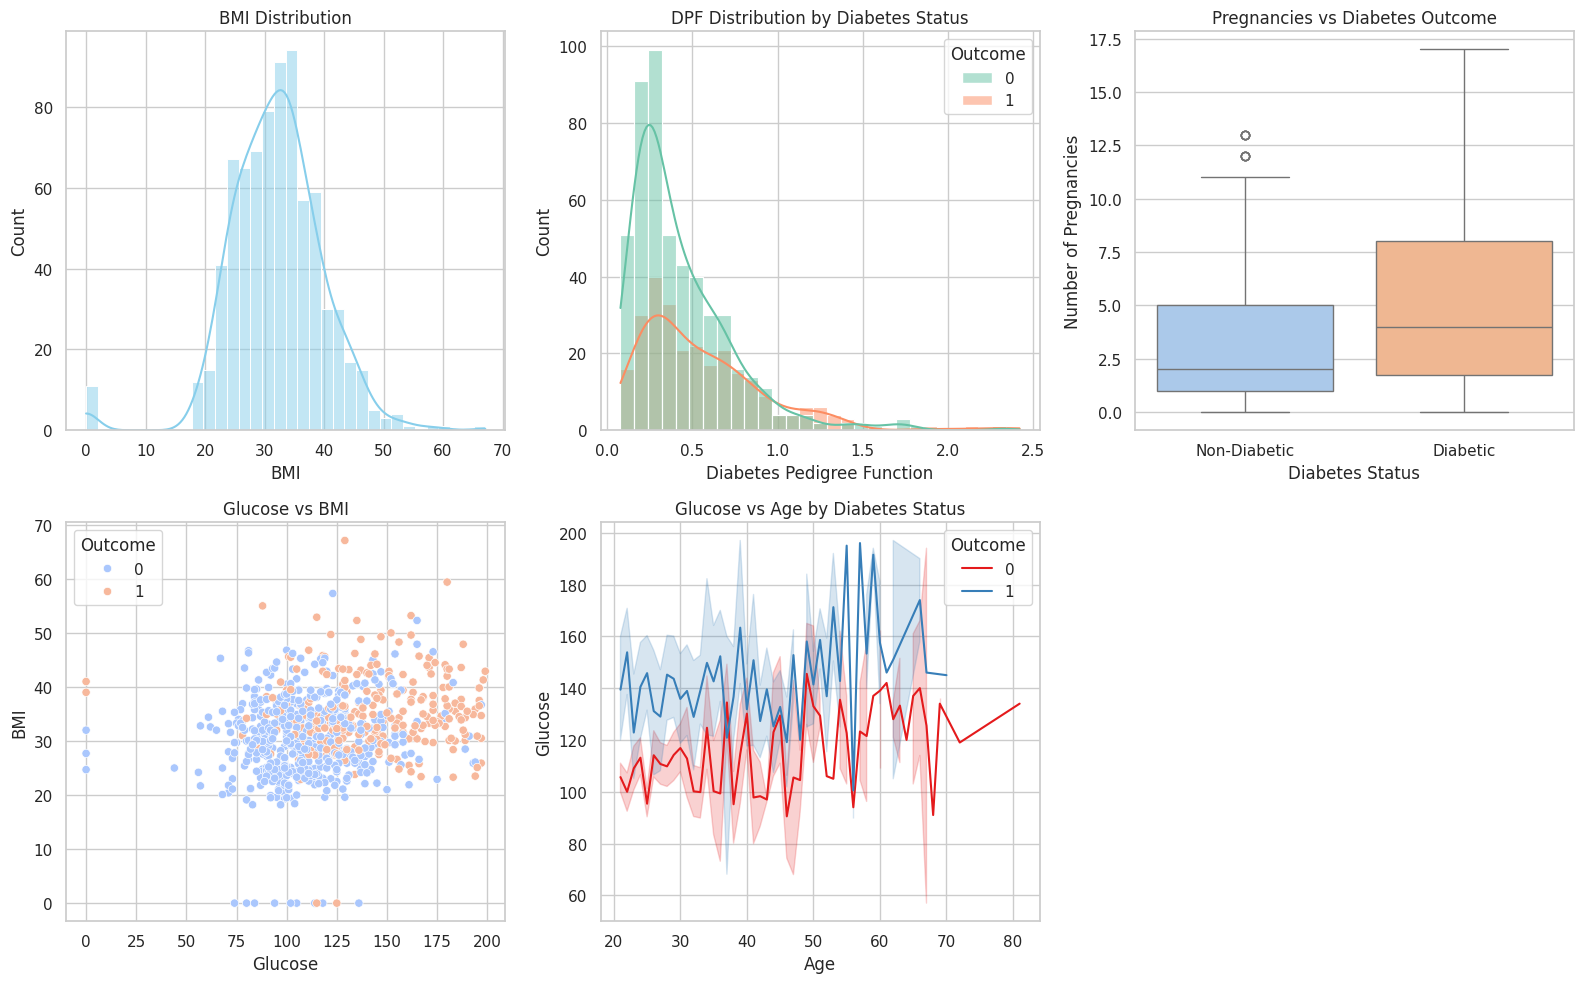

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Distribution of BMI values among all patients
plt.subplot(2, 3, 1)
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")

# Distribution of DPF values for diabetic and non-diabetic patients
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, palette='Set2')
plt.title("DPF Distribution by Diabetes Status")
plt.xlabel("Diabetes Pedigree Function")

# Relationship between number of pregnancies and diabetes occurrence
plt.subplot(2, 3, 3)
sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette='pastel')
plt.title("Pregnancies vs Diabetes Outcome")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.xlabel("Diabetes Status")
plt.ylabel("Number of Pregnancies")

# Correlation between glucose levels and BMI
plt.subplot(2, 3, 4)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")

# Trend of glucose levels with age among diabetic and non-diabetic patients
plt.subplot(2, 3, 5)
sns.lineplot(data=df.sort_values('Age'), x='Age', y='Glucose', hue='Outcome', palette='Set1')
plt.title("Glucose vs Age by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Glucose")

plt.tight_layout()
plt.show()

from the boxplot of Pregnancies vs Diabetes Outcome, we saw that Diabetic patients tend to have a higher median number of pregnancies than non-diabetic patients and the range and outliers also show that some diabetic patients have significantly more pregnancies at the end, There is a positive association between the number of pregnancies and diabetes risk in this dataset.

- From the lineplot, we observed that glucose levels tend to increase with age, especially in diabetic patients.